In [1]:
# EXTRAER DATOS
#Usé Excel para traerlos y depurarlos, luego los puse como lista aquí y al final los cargo directamente como lista.
import pandas as pd
import numpy as np # librería para manejar datos vectorizados

import pandas as pd # librería para análisis de datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # librería para manejar archivos JSON 

#!conda install -c conda-forge geopy --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud

import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas

# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors

# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare
import folium # librería para graficar mapas 

print('Libraries imported.')


lista1=['M3A', 'M4A', 'M5A', 	'M6A', 	'M7A', 	'M9A', 	'M1B', 	'M3B', 	'M4B', 	'M5B', 	'M6B', 	'M9B', 	'M1C', 	'M3C', 	'M4C', 	'M5C', 	'M6C', 	'M9C', 	'M1E', 	'M4E', 	'M5E', 	'M6E', 	'M1G', 	'M4G', 	'M5G', 	'M6G', 	'M1H', 	'M2H', 	'M3H', 	'M4H', 	'M5H', 	'M6H', 	'M1J', 	'M2J', 	'M3J', 	'M4J', 	'M5J', 	'M6J', 	'M1K', 	'M2K', 	'M3K', 	'M4K', 	'M5K', 	'M6K', 	'M1L', 	'M2L', 	'M3L', 	'M4L', 	'M5L', 	'M6L', 	'M9L', 	'M1M', 	'M2M', 	'M3M', 	'M4M', 	'M5M', 	'M6M', 	'M9M', 	'M1N', 	'M2N', 	'M3N', 	'M4N', 	'M5N', 	'M6N', 	'M9N', 	'M1P', 	'M2P', 	'M4P', 	'M5P', 	'M6P', 	'M9P', 	'M1R', 	'M2R', 	'M4R', 	'M5R', 	'M6R', 	'M7R', 	'M9R', 	'M1S', 	'M4S', 	'M5S', 	'M6S', 	'M1T', 	'M4T', 	'M5T', 	'M1V', 	'M4V', 	'M5V', 	'M8V', 	'M9V', 	'M1W', 	'M4W', 	'M5W', 	'M8W', 	'M9W', 	'M1X', 	'M4X', 	'M5X', 	'M8X', 	'M4Y', 	'M7Y', 	'M8Y', 	'M8Z'] 
lista2=['North York','North York',	'Downtown Toronto',	'North York',	"Queen's Park",	'Etobicoke',	'Scarborough',	'North York',	'East York',	'Downtown Toronto',	'North York',	'Etobicoke',	'Scarborough',	'North York',	'East York',	'Downtown Toronto',	'York',	'Etobicoke',	'Scarborough',	'East Toronto',	'Downtown Toronto',	'York',	'Scarborough',	'East York',	'Downtown Toronto',	'Downtown Toronto',	'Scarborough',	'North York',	'North York',	'East York',	'Downtown Toronto',	'West Toronto',	'Scarborough',	'North York',	'North York',	'East York',	'Downtown Toronto',	'West Toronto',	'Scarborough',	'North York',	'North York',	'East Toronto',	'Downtown Toronto',	'West Toronto',	'Scarborough',	'North York',	'North York',	'East Toronto',	'Downtown Toronto',	'North York',	'North York',	'Scarborough',	'North York',	'North York',	'East Toronto',	'North York',	'York',	'North York',	'Scarborough',	'North York',	'North York',	'Central Toronto',	'Central Toronto',	'York',	'York',	'Scarborough',	'North York',	'Central Toronto',	'Central Toronto',	'West Toronto',	'Etobicoke',	'Scarborough',	'North York',	'Central Toronto',	'Central Toronto',	'West Toronto',	'Mississauga',	'Etobicoke',	'Scarborough',	'Central Toronto',	'Downtown Toronto',	'West Toronto',	'Scarborough',	'Central Toronto',	'Downtown Toronto',	'Scarborough',	'Central Toronto',	'Downtown Toronto',	'Etobicoke',	'Etobicoke',	'Scarborough',	'Downtown Toronto',	'Downtown Toronto',	'Etobicoke',	'Etobicoke',	'Scarborough',	'Downtown Toronto',	'Downtown Toronto',	'Etobicoke',	'Downtown Toronto',	'East Toronto',	'Etobicoke',	'Etobicoke']
lista3=['Parkwoods', 'Victoria Village', 'Regent Park, Harbourfront', 'Lawrence Manor, Lawrence Heights', 'Ontario Provincial Government', 'Islington Avenue', 'Malvern, Rouge', 'Don Mills', 'Parkview Hill, Woodbine Gardens', 'Garden District,\xa0Ryerson', 'Glencairn', 'West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale', 'Rouge Hill, Port Union, Highland Creek', 'Don Mills, Flemingdon Park', 'Woodbine Heights', 'St. James Town', 'Humewood-Cedarvale', 'Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood', 'Guildwood, Morningside, West Hill', 'The Beaches', 'Berczy Park', 'Caledonia-Fairbanks', 'Woburn', 'Leaside', 'Central\xa0Bay Street', 'Christie', 'Cedarbrae', 'Hillcrest Village', 'Bathurst Manor, Wilson Heights, Downsview\xa0North', 'Thorncliffe Park', 'Richmond, Adelaide, King', 'Dufferin, Dovercourt Village', 'Scarborough Village', 'Fairview, Henry Farm, Oriole', 'Northwood Park, York University', 'The Danforth', 'Harbourfront\xa0East, Union Station, Toronto Islands', 'Little Portugal, Trinity', 'Kennedy Park, Ionview, East\xa0Birchmount Park', 'Bayview Village', 'Downsview, CFB Toronto', 'The Danforth\xa0West, Riverdale', 'Toronto Dominion Centre, Design Exchange', 'Brockton, Parkdale Village, Exhibition Place', 'Golden Mile, Clairlea, Oakridge', 'York Mills, Silver Hills', 'Downsview', 'India Bazaar, The Beaches\xa0West', 'Commerce Court, Victoria Hotel', 'North Park, Maple Leaf Park, Upwood Park', 'Humber Summit', 'Cliffside, Cliffcrest, Scarborough Village\xa0West', 'Willowdale, Newtonbrook', 'Downsview', 'Studio District', 'Bedford Park, Lawrence Manor\xa0East', 'Del Ray,\xa0Mount Dennis, Keelsdale and Silverthorn', 'Humberlea, Emery', 'Birch Cliff, Cliffside\xa0West', 'Willowdale', 'Downsview', 'Lawrence Park', 'Roselawn', 'Runnymede, The Junction\xa0North', 'Weston', 'Dorset Park, Wexford Heights, Scarborough Town Centre', 'York Mills\xa0West', 'Davisville\xa0North', 'Forest Hill\xa0North & West', 'High Park, The Junction\xa0South', 'Westmount', 'Wexford, Maryvale', 'Willowdale', 'North Toronto\xa0West', 'The Annex, North Midtown, Yorkville', 'Parkdale, Roncesvalles', 'Canada Post Gateway Processing Centre', 'Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens', 'Agincourt', 'Davisville', 'University of Toronto, Harbord', 'Runnymede, Swansea', "Clarks Corners,\xa0Tam O'Shanter, Sullivan", 'Moore Park, Summerhill\xa0East', 'Kensington Market, Chinatown, Grange Park', "Milliken, Agincourt North, Steeles\xa0East,\xa0L'Amoreaux\xa0East", 'Summerhill\xa0West,\xa0Rathnelly, South Hill, Forest Hill\xa0SE,\xa0Deer Park', 'CN Tower, King and Spadina, Railway Lands, Harbourfront\xa0West, Bathurst Quay,\xa0South Niagara, Island airport', 'New Toronto, Mimico\xa0South, Humber Bay Shores', 'South Steeles, Silverstone, Humbergate,\xa0Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens', "Steeles\xa0West,\xa0L'Amoreaux\xa0West", 'Rosedale', 'Stn A PO Boxes', 'Alderwood, Long Branch', 'Clairville, Humberwood, Woodbine Downs, West Humber, Kipling Heights,\xa0Rexdale, Elms, Tandridge, Old Rexdale', 'Upper Rouge', 'St. James Town, Cabbagetown', 'First Canadian Place, Underground city', 'The Kingsway, Montgomery Road,\xa0Old Mill\xa0North', 'Church and Wellesley', 'Business reply mail\xa0Processing Centre', "Old Mill\xa0South, King's Mill Park,\xa0Sunnylea,\xa0Humber Bay, Mimico\xa0NE,\xa0The Queensway\xa0East, Royal York South East, Kingsway Park South East", 'Mimico\xa0NW,\xa0The Queensway\xa0West, South of Bloor, Kingsway Park South West, Royal York South West']
user_list = list(zip(lista1,lista2,lista3))
df=pd.DataFrame(user_list, columns=["PostalCode","Borough","Neighborhood"])
df=df.set_index("PostalCode")
df.sort_values(by=["PostalCode"])

Libraries imported.


,Borough,Neighborhood
PostalCode,,
M1B,Scarborough,"Malvern, Rouge"
M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae
M1J,Scarborough,Scarborough Village
M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"


In [2]:
#Cargo el archivo de coordenadas y ordeno por PostalCode
coordenadas=pd.read_csv("D:\Descargas\Geospatial_Coordinates.csv")
coordenadas=coordenadas.set_index("Postal Code")
coordenadas

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476
M1J,43.744734,-79.239476
M1K,43.727929,-79.262029
M1L,43.711112,-79.284577
M1M,43.716316,-79.239476


In [3]:
#Agrega las dos columnas de latitud y longitud
df2=df.assign(Latitude = coordenadas["Latitude"])
df3=df2.assign(Longitude = coordenadas["Longitude"])
df3

,Borough,Neighborhood,Latitude,Longitude
PostalCode,,,,
M3A,North York,Parkwoods,43.753259,-79.329656
M4A,North York,Victoria Village,43.725882,-79.315572
M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
M3B,North York,Don Mills,43.745906,-79.352188
M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937


In [4]:
#Análisis de agrupación y segmentación solo para TORONTO

df3 = df3.drop(df3[df3['Borough']=="East York"].index)
df3 = df3.drop(df3[df3['Borough']=="Etobicoke"].index)
df3 = df3.drop(df3[df3['Borough']=="Mississauga"].index)
df3 = df3.drop(df3[df3['Borough']=="North York"].index)
df3 = df3.drop(df3[df3['Borough']=="Queen's Park"].index)
df3 = df3.drop(df3[df3['Borough']=="Scarborough"].index)
df3 = df3.drop(df3[df3['Borough']=="York"].index)
df3

,Borough,Neighborhood,Latitude,Longitude
PostalCode,,,,
M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
M4E,East Toronto,The Beaches,43.676357,-79.293031
M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
M6G,Downtown Toronto,Christie,43.669542,-79.422564
M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [27]:
#Crear mapa
latitude=43.7166
longitude=-79.3407
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# añadir marcadores al mapa
for lat, lng, borough, neighborhood in zip(df3['Latitude'], df3['Longitude'], df3['Borough'], df3['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
#         fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [205]:
#Solo se cogió un barrrio y se hallaron los venues cercanos (The Beaches en East Toronto)
url = "https://api.foursquare.com/v3/places/nearby?ll=43.676357%2C-79.293031&limit=50"
headers = {"Accept": "application/json","Authorization": "fsq3H9/faPTYfJlDZmuigCc0PYIPtX8KGAw0HUgAnlSSvkE="}
response = requests.request("GET", url, headers=headers).json()
results=json_normalize(response["results"])

#Muestra los resultados del barrio
results

<ipython-input-205-50fac3b6a356>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  results=json_normalize(response["results"])


,fsq_id,categories,chains,distance,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.neighborhood,location.address_extended
0,4bd461bc77b29c74a07d9282,"[{'id': 16019, 'name': 'Hiking Trail', 'icon':...",[],89,Glen Manor Ravine,America/Toronto,43.676676,-79.294126,43.676676,-79.294126,Glen Manor,CA,Queen St.,"Glen Manor (Queen St.), Toronto ON",Toronto,,ON,NaN,NaN
1,4dbc8fe96a23e294ba3237bd,"[{'id': 16032, 'name': 'Park', 'icon': {'prefi...",[],176,Glen Stewart Park,America/Toronto,43.674403,-79.294516,43.674403,-79.294516,131 Glen Manor Dr,CA,,"131 Glen Manor Dr, Toronto ON",Toronto,,ON,NaN,NaN
2,4b8daea1f964a520480833e3,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",[],460,The Grover Pub & Grub,America/Toronto,43.679260,-79.297245,43.679260,-79.297245,676 Kingston Rd,CA,at Main St.,"676 Kingston Rd (at Main St.), Toronto ON M4E 1R4",Toronto,M4E 1R4,ON,[East York],NaN
3,4e261a1118a81b3b73a9e1e9,"[{'id': 11057, 'name': 'Caterer', 'icon': {'pr...",[],532,Veloute Bistro & Catering,America/Toronto,43.672070,-79.289473,43.672070,-79.289473,2343 Queen St E,CA,,"2343 Queen St E, Toronto ON M4E 1H2",Toronto,M4E 1H2,ON,[The Beach],NaN
4,5ea88bfaa7a46800077a492c,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[{'id': 'd5719cc0-d890-0132-61d3-7a163eb2a6fc'...,478,Tim Hortons,America/Toronto,43.678684,-79.298230,43.678684,-79.298230,637 Kingston Rd,CA,,"637 Kingston Rd, Toronto ON M4E 1R3",Toronto,M4E 1R3,ON,[The Beaches],NaN
5,4dbdfa5effcbcd485670ef68,"[{'id': 18021, 'name': 'Gym and Studio', 'icon...",[],1655,Beaches Fitness,America/Toronto,43.669362,-79.311090,NaN,NaN,121 Kingston Rd,CA,Dundas St E,"121 Kingston Rd (Dundas St E), Toronto ON M4L 1T2",Toronto,M4L 1T2,ON,NaN,NaN
6,510ace3b1648bb726853baa4,"[{'id': 17082, 'name': 'Furniture and Home Sto...",[],511,Essentia at the Beach,America/Toronto,43.672199,-79.290803,43.672199,-79.290803,2180 Queen St E,CA,Maclean & Queen,"2180 Queen St E (Maclean & Queen), Toronto ON ...",Toronto,M4E 1E6,ON,NaN,NaN
7,4c2e860aac0ab713588c1b1e,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[],516,Swiss Chalet Rotisserie & Grill,America/Toronto,43.671648,-79.293008,43.671648,-79.293008,2148 Queen St E,CA,Glen Manor Drive,"2148 Queen St E (Glen Manor Drive), Toronto ON...",Toronto,M4E 1E3,ON,[The Beach],NaN
8,4c153eecb7b9c928afa5ac37,"[{'id': 16032, 'name': 'Park', 'icon': {'prefi...",[],522,Ivan Forrest Gardens,America/Toronto,43.672465,-79.292575,43.672465,-79.292575,131 Glen Manor Dr,CA,,"131 Glen Manor Dr, Toronto ON",Toronto,,ON,[East York],NaN
9,4ba2b834f964a5203f1338e3,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",[],532,Mullins Irish Pub,America/Toronto,43.680183,-79.289064,43.680183,-79.289064,917 Kingston Rd,CA,at Balsam Ave,"917 Kingston Rd (at Balsam Ave), Toronto ON M4...",Toronto,M4E 1S6,ON,[The Beach],NaN


In [206]:
#Señala el índice
#Elimina los NA de categories
data = results.drop([20,17],axis=0)
data=data.reset_index()

#Muestra tras la limpieza
data

,index,fsq_id,categories,chains,distance,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.neighborhood,location.address_extended
0,0,4bd461bc77b29c74a07d9282,"[{'id': 16019, 'name': 'Hiking Trail', 'icon':...",[],89,Glen Manor Ravine,America/Toronto,43.676676,-79.294126,43.676676,-79.294126,Glen Manor,CA,Queen St.,"Glen Manor (Queen St.), Toronto ON",Toronto,,ON,NaN,NaN
1,1,4dbc8fe96a23e294ba3237bd,"[{'id': 16032, 'name': 'Park', 'icon': {'prefi...",[],176,Glen Stewart Park,America/Toronto,43.674403,-79.294516,43.674403,-79.294516,131 Glen Manor Dr,CA,,"131 Glen Manor Dr, Toronto ON",Toronto,,ON,NaN,NaN
2,2,4b8daea1f964a520480833e3,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",[],460,The Grover Pub & Grub,America/Toronto,43.679260,-79.297245,43.679260,-79.297245,676 Kingston Rd,CA,at Main St.,"676 Kingston Rd (at Main St.), Toronto ON M4E 1R4",Toronto,M4E 1R4,ON,[East York],NaN
3,3,4e261a1118a81b3b73a9e1e9,"[{'id': 11057, 'name': 'Caterer', 'icon': {'pr...",[],532,Veloute Bistro & Catering,America/Toronto,43.672070,-79.289473,43.672070,-79.289473,2343 Queen St E,CA,,"2343 Queen St E, Toronto ON M4E 1H2",Toronto,M4E 1H2,ON,[The Beach],NaN
4,4,5ea88bfaa7a46800077a492c,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[{'id': 'd5719cc0-d890-0132-61d3-7a163eb2a6fc'...,478,Tim Hortons,America/Toronto,43.678684,-79.298230,43.678684,-79.298230,637 Kingston Rd,CA,,"637 Kingston Rd, Toronto ON M4E 1R3",Toronto,M4E 1R3,ON,[The Beaches],NaN
5,5,4dbdfa5effcbcd485670ef68,"[{'id': 18021, 'name': 'Gym and Studio', 'icon...",[],1655,Beaches Fitness,America/Toronto,43.669362,-79.311090,NaN,NaN,121 Kingston Rd,CA,Dundas St E,"121 Kingston Rd (Dundas St E), Toronto ON M4L 1T2",Toronto,M4L 1T2,ON,NaN,NaN
6,6,510ace3b1648bb726853baa4,"[{'id': 17082, 'name': 'Furniture and Home Sto...",[],511,Essentia at the Beach,America/Toronto,43.672199,-79.290803,43.672199,-79.290803,2180 Queen St E,CA,Maclean & Queen,"2180 Queen St E (Maclean & Queen), Toronto ON ...",Toronto,M4E 1E6,ON,NaN,NaN
7,7,4c2e860aac0ab713588c1b1e,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[],516,Swiss Chalet Rotisserie & Grill,America/Toronto,43.671648,-79.293008,43.671648,-79.293008,2148 Queen St E,CA,Glen Manor Drive,"2148 Queen St E (Glen Manor Drive), Toronto ON...",Toronto,M4E 1E3,ON,[The Beach],NaN
8,8,4c153eecb7b9c928afa5ac37,"[{'id': 16032, 'name': 'Park', 'icon': {'prefi...",[],522,Ivan Forrest Gardens,America/Toronto,43.672465,-79.292575,43.672465,-79.292575,131 Glen Manor Dr,CA,,"131 Glen Manor Dr, Toronto ON",Toronto,,ON,[East York],NaN
9,9,4ba2b834f964a5203f1338e3,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",[],532,Mullins Irish Pub,America/Toronto,43.680183,-79.289064,43.680183,-79.289064,917 Kingston Rd,CA,at Balsam Ave,"917 Kingston Rd (at Balsam Ave), Toronto ON M4...",Toronto,M4E 1S6,ON,[The Beach],NaN


In [207]:
#Extrae solo categories y distance
data2=data[['categories','distance']]
data2

,categories,distance
0,"[{'id': 16019, 'name': 'Hiking Trail', 'icon':...",89
1,"[{'id': 16032, 'name': 'Park', 'icon': {'prefi...",176
2,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",460
3,"[{'id': 11057, 'name': 'Caterer', 'icon': {'pr...",532
4,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",478
5,"[{'id': 18021, 'name': 'Gym and Studio', 'icon...",1655
6,"[{'id': 17082, 'name': 'Furniture and Home Sto...",511
7,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",516
8,"[{'id': 16032, 'name': 'Park', 'icon': {'prefi...",522
9,"[{'id': 13018, 'name': 'Pub', 'icon': {'prefix...",532


In [208]:
#Extrae los tipos de locales
bandera=0
lista=[]
for i in range(len(data2)):
    pivot=data2["categories"][bandera]
    pivot2=pivot[0]["name"]
    lista.append(pivot2)
    bandera=bandera+1
lista

['Hiking Trail',
 'Park',
 'Pub',
 'Caterer',
 'Restaurant',
 'Gym and Studio',
 'Furniture and Home Store',
 'Restaurant',
 'Park',
 'Pub',
 'Diner',
 'Lounge',
 'Pizzeria',
 'Bakery',
 'Playground',
 'Flower Store',
 'Hair Salon',
 'Pet Grooming Service',
 'Advertising Agency',
 'Nail Salon',
 'Dessert Shop',
 'Dance Studio',
 'Martial Arts Dojo',
 'Dance Studio',
 'Film Studio',
 'Playground',
 'Bakery',
 'Diner',
 'Café',
 'Bakery',
 'Diner',
 'Park',
 'Massage Clinic',
 'Residential Building',
 'Winery']

In [209]:
#Los pone en la columna
data2["categories"]=lista
data2

<ipython-input-209-09df8ade9410>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["categories"]=lista


,categories,distance
0,Hiking Trail,89
1,Park,176
2,Pub,460
3,Caterer,532
4,Restaurant,478
5,Gym and Studio,1655
6,Furniture and Home Store,511
7,Restaurant,516
8,Park,522
9,Pub,532


In [210]:
#Agrupa en función de la categoría y el promedio de distancia
data2.groupby("categories").mean()

,distance
categories,
Advertising Agency,543.000000
Bakery,508.000000
Café,484.000000
Caterer,532.000000
Dance Studio,502.500000
Dessert Shop,548.000000
Diner,516.666667
Film Studio,428.000000
Flower Store,514.000000


In [211]:
#Ahora sí, agrupamos de acuerdo con la distancia
##Primero estandarizamos
from sklearn.preprocessing import StandardScaler
X = data2.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet


array([[-1.83176472e+00],
       [-1.44404586e+00],
       [-1.78388876e-01],
       [ 1.42481907e-01],
       [-9.81711802e-02],
       [ 5.14717482e+00],
       [ 4.88945956e-02],
       [ 7.11772889e-02],
       [ 9.79165209e-02],
       [ 1.42481907e-01],
       [ 4.88945956e-02],
       [ 1.69221139e-01],
       [-1.78388876e-01],
       [ 8.45469049e-02],
       [-5.12629276e-01],
       [ 6.22642116e-02],
       [ 1.76988250e-02],
       [-1.79534843e-02],
       [ 1.91503833e-01],
       [-4.76976966e-01],
       [ 2.13786526e-01],
       [ 6.22642116e-02],
       [ 1.20199214e-01],
       [-4.02361776e-02],
       [-3.20998113e-01],
       [-1.42176316e+00],
       [-1.24910412e-01],
       [-4.58386834e-03],
       [-7.14319483e-02],
       [ 1.46938446e-01],
       [ 1.78134217e-01],
       [-2.22954263e-01],
       [ 1.42481907e-01],
       [-1.73932337e-01],
       [ 3.10684410e-02]])

In [212]:
##Creación de la agrupación
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]


In [218]:
#Clasificamos a cada uno
data2["Clus_km"] = labels
data2

<ipython-input-218-929cebf66ae6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Clus_km"] = labels


,categories,distance,Clus_km
0,Hiking Trail,89,2
1,Park,176,2
2,Pub,460,1
3,Caterer,532,1
4,Restaurant,478,1
5,Gym and Studio,1655,0
6,Furniture and Home Store,511,1
7,Restaurant,516,1
8,Park,522,1
9,Pub,532,1


In [222]:
#Verificamos medias de cada agrupación
data2.groupby('Clus_km').mean()

,categories,distance
Clus_km,,
0,1,1
1,31,31
2,3,3


In [ ]:
#Verificamos el conteo de cada agrupación
data2.groupby('Clus_km').count()

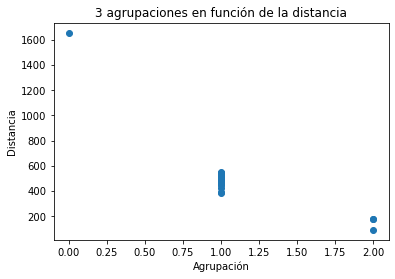

In [227]:
#Graficamos
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(data2["Clus_km"],data2["distance"])
plt.xlabel('Agrupación')
plt.ylabel('Distancia')
plt.title('3 agrupaciones en función de la distancia')
plt.show()